In [4]:
import pandas as pd
import io
import requests
import datetime

## Get the Timeseries Data

Add documentation about the time series here.

In [8]:
from functions import get_time_series

confirmed, deaths, recovered = get_time_series(local=True)

## Get all the Daily Reports 

Add documentation about these reports here.

In [9]:
from functions import get_daily_reports

daily_report_data, dates = get_daily_reports(local=True)

Failed to load data/03-13-2020.csv


## All Done Gathering Data.

Let's merge the time_series_data into one dataframe

In [6]:
from functions import get_date_list
date_list = get_date_list(dates)

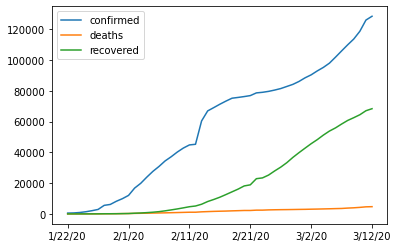

In [7]:
totals_by_day = pd.DataFrame(
    data={
        'confirmed': [confirmed[date].sum() for date in date_list],
        'deaths': [deaths[date].sum() for date in date_list],
        'recovered': [recovered[date].sum() for date in date_list]
    }, index=date_list)

totals_by_day.plot()